# Data Analysis
Get insights from the data, and generate visualizations to help understand the data better.

## Import dependencies

In [2]:
from preliminary_analysis_tweet import run_tweet_analysis
from preliminary_analysis_text import run_text_analysis
from preliminary_analysis_code import run_code_analysis

## Run Analysis on Tweets
Args:
- file: path to the csv file (String)
- save: whether to save the generated plots (Boolean)

Number of tweets: 314065
Time range: 2022-01-01 00:19:09 to 2023-06-28 23:39:18
Number of users: 27890
Mean number of tweets per user: 11.260846181427034
Median number of tweets per user: 1.0
Min number of tweets per user: 1
Max number of tweets per user: 222147
Number of users with more than 10 tweets: 1040
Number of users with more than 100 tweets: 89


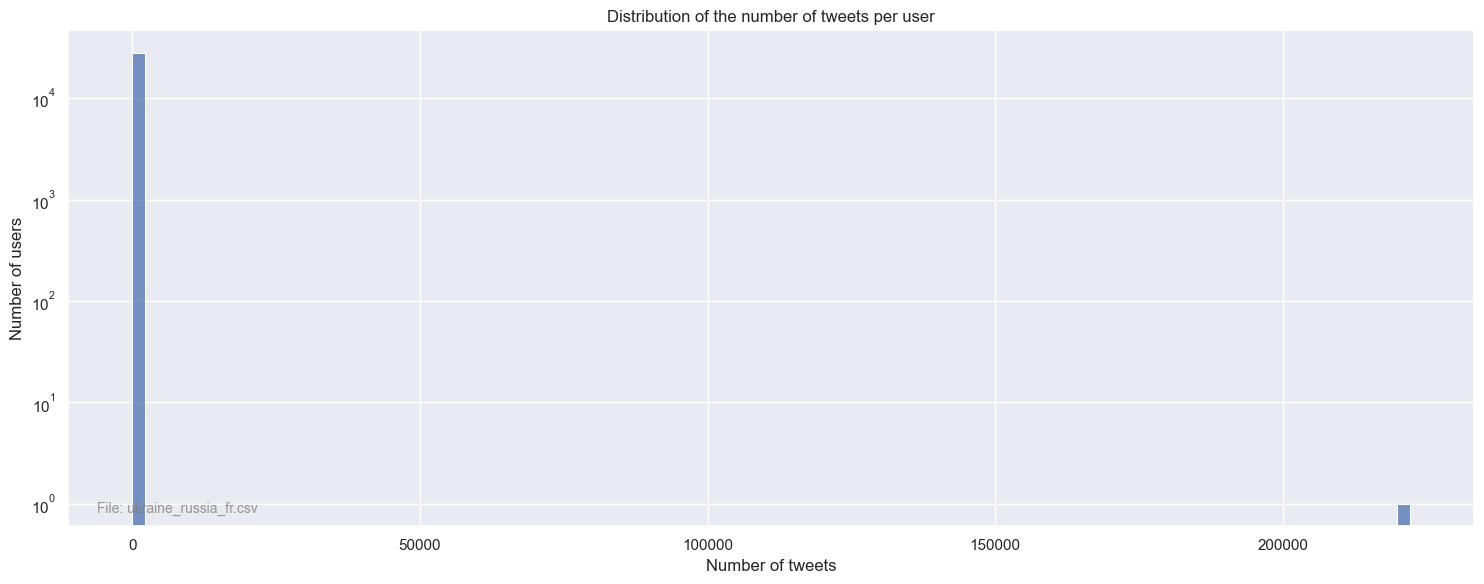

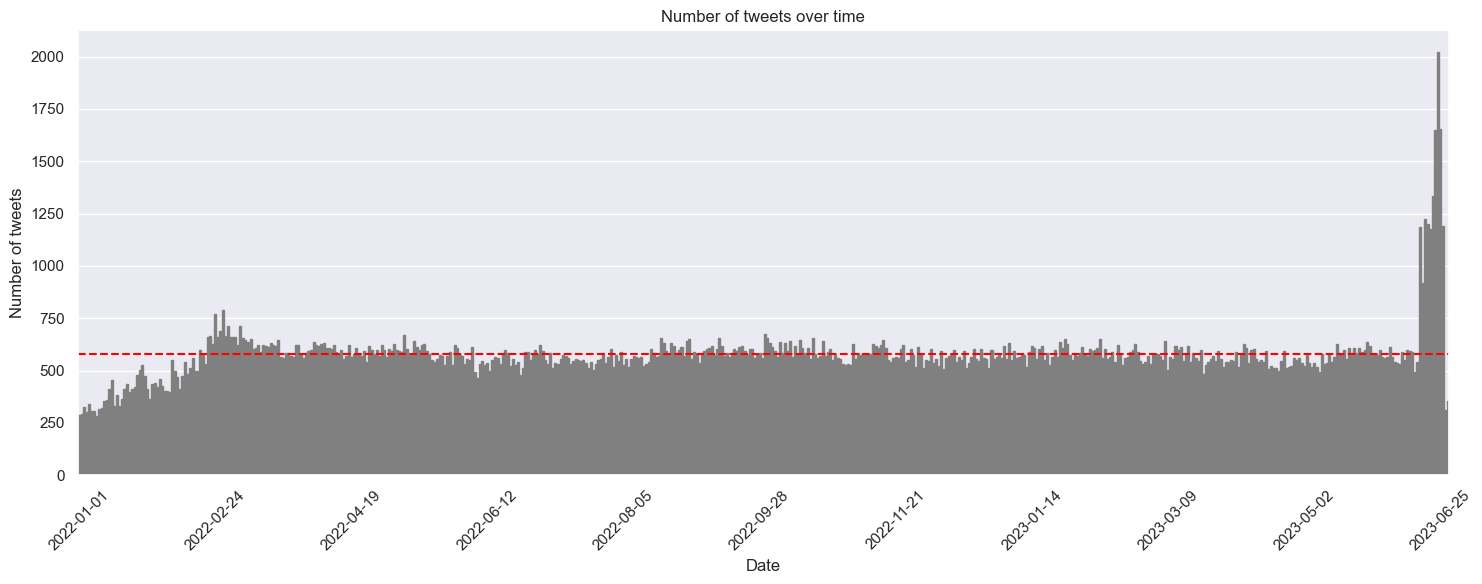

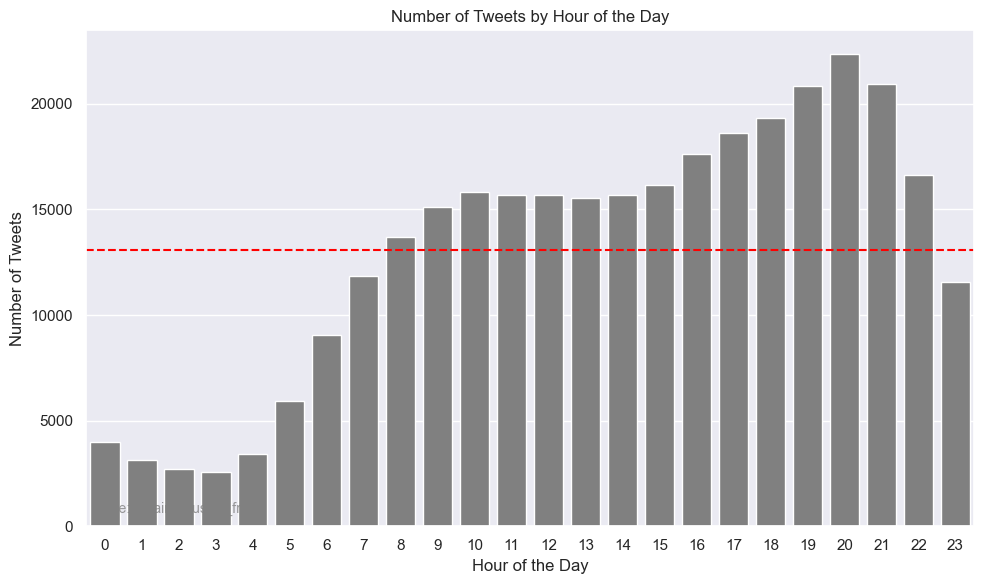

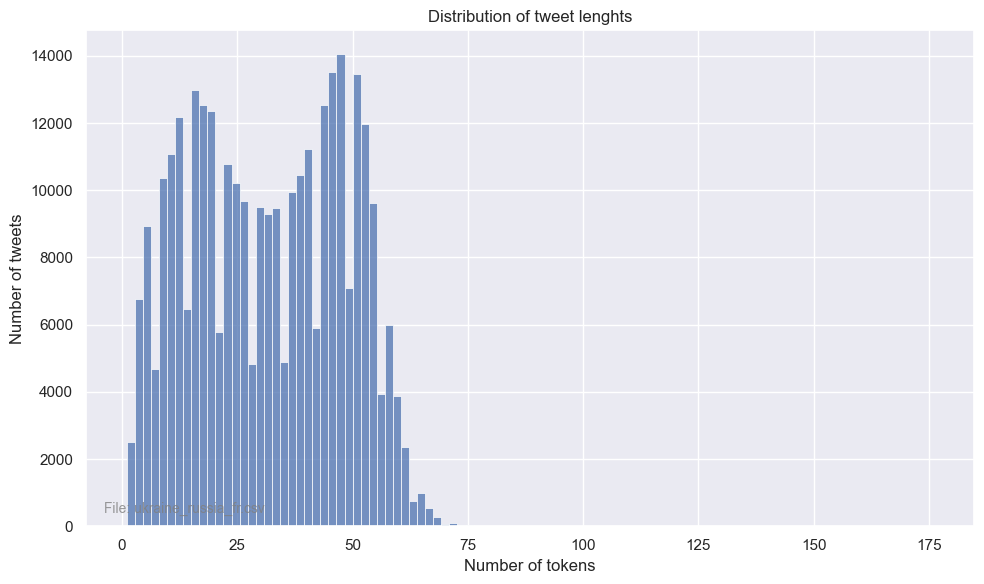

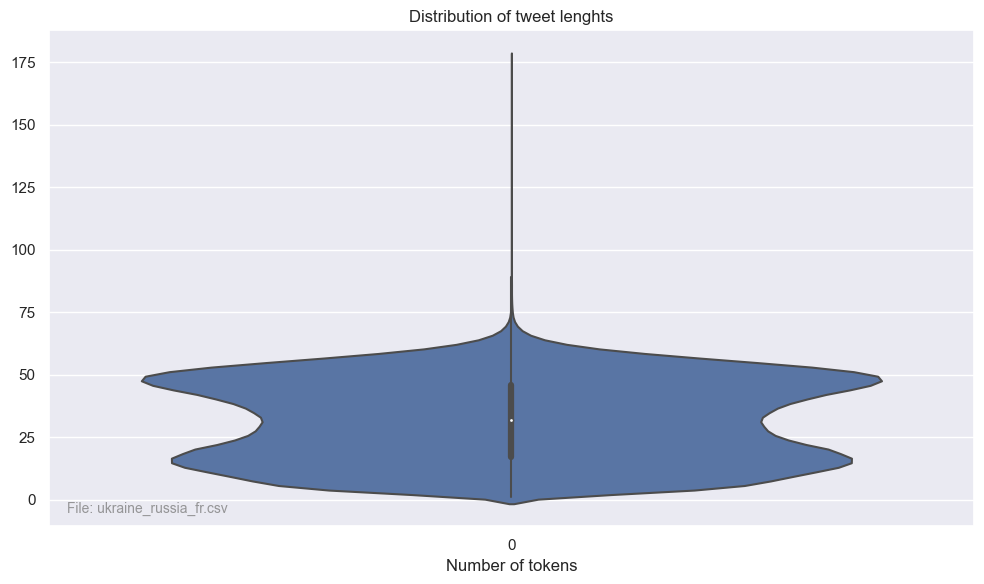

Mean number of tokens per tweet: 31.48727492716476
Median number of tokens per tweet: 32.0
Std number of tokens per tweet: 16.53356372788492
Q1 number of tokens per tweet: 17.0
Q3 number of tokens per tweet: 46.0
Min number of tokens per tweet: 1
Max number of tokens per tweet: 176


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Total number of tokens: 9578627
Vocabulary size: 187950
Number of tokens that only appear:
	1: 98531, 52.42%
	<=2: 122077, 64.95%
	<=3: 133721, 71.15%
	<=4: 140928, 74.98%
	<=5: 146218, 77.80%
	<=10: 159268, 84.74%
	<=100: 181754, 96.70%


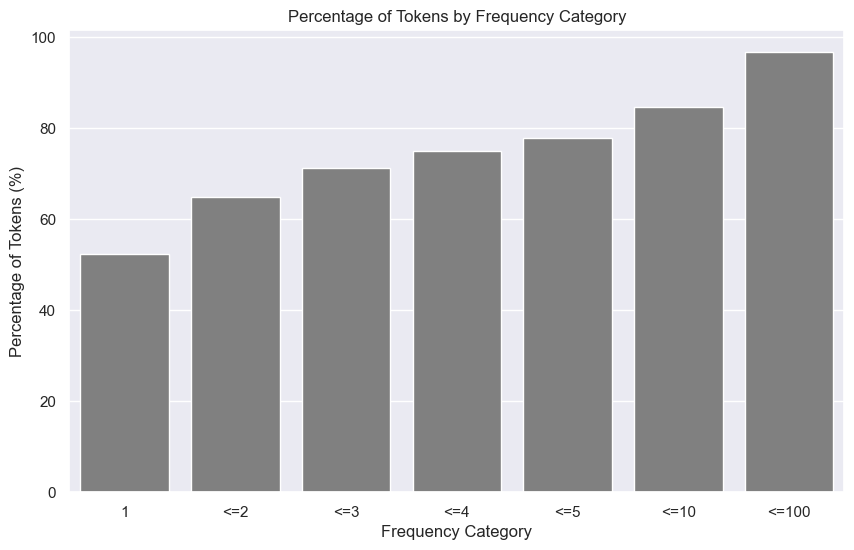

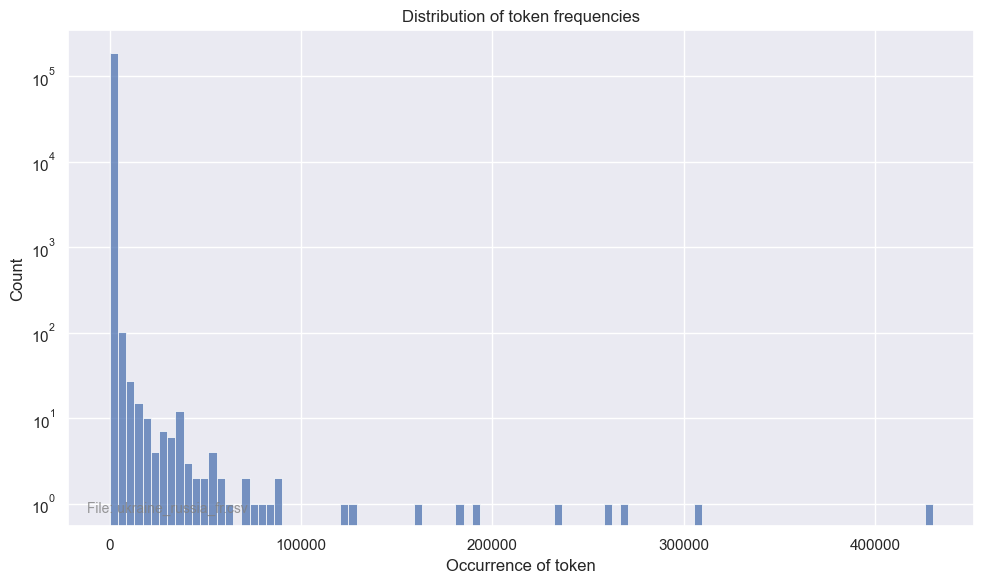

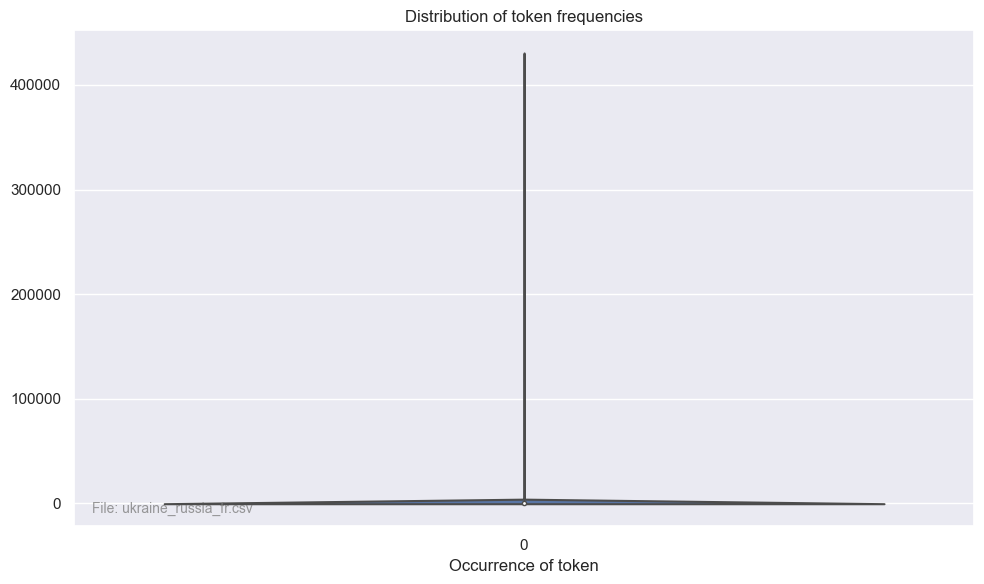


Most common tokens:
   token   count
7     de  430195
17     ,  308563
35     .  267541
3     la  259063
37     a  236203
29    le  189581
13   les  183899
32    et  162224
33    en  127436
72   des  121369


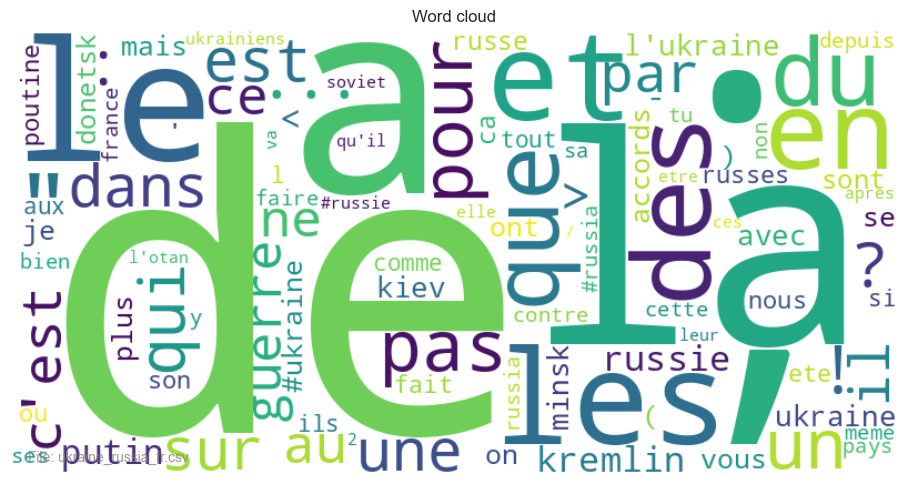


Most common tokens without punctuation:
   token   count
7     de  430195
3     la  259063
37     a  236203
29    le  189581
13   les  183899
32    et  162224
33    en  127436
72   des  121369
24    du   88801
21   que   86329


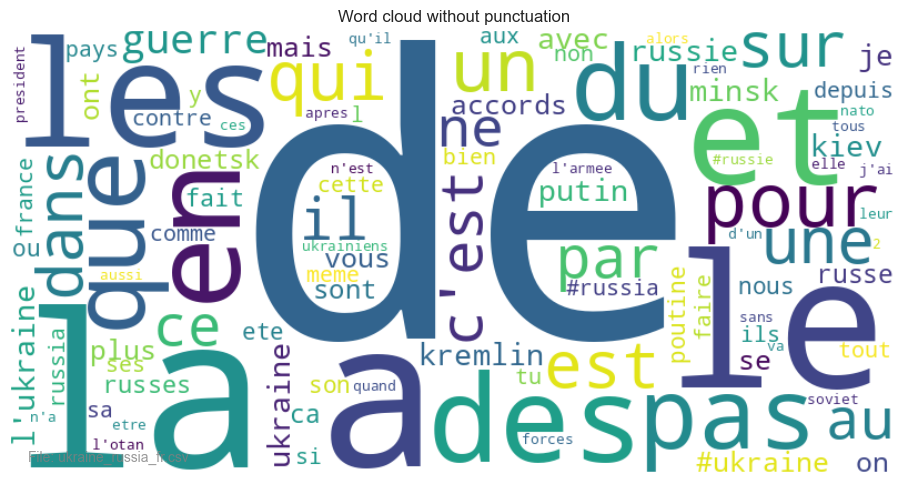


Most common tokens without stopwords:
          token  count
23        c'est  46002
954      guerre  38367
3254    kremlin  37879
637      russie  37639
6         putin  37582
1935  l'ukraine  37458
2776    ukraine  36097
9672      minsk  35647
8396       kiev  35485
3767   #ukraine  29052


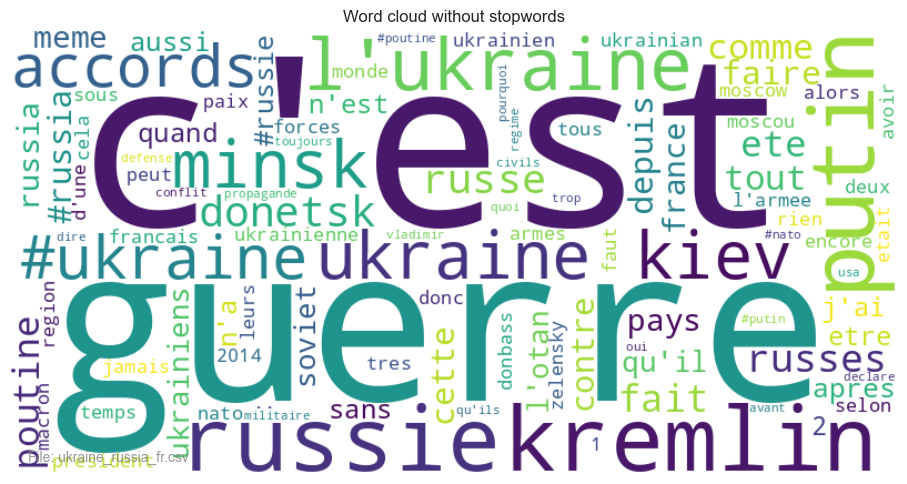

In [8]:
run_tweet_analysis(
    file= "../../data/clean/scraping-cleaned/ukraine_russia_fr.csv",
    save=False)

## Run Analysis on Code
Args:
- file: path to the csv file (String)
- save: whether to save the generated plots (Boolean)

In [ ]:
run_code_analysis(
    file= "../../data/code/Java/clean_w_ALL/Java_clean_w_ALL.csv",
    save=False)

## Run Analysis on Text
Args:
- file: path to the csv file (String)
- save: whether to save the generated plots (Boolean)

In [13]:
run_text_analysis(
    file = "../../data/raw/books/alice29.txt",
    save=False)

## Run Analysis on Covid-19 Tweets

In [5]:
import subprocess
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

dates = []
lines_count = []
languages = []

directory_path = '../../data/covid-cleaned'

In [3]:
for subdir_name in os.listdir(directory_path):
    subdir_path = os.path.join(directory_path, subdir_name)
    
    if os.path.isdir(subdir_path) and "_by_" in subdir_name:
        language = subdir_name.split('_by_')[-1]

        for filename in os.listdir(subdir_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(subdir_path, filename)
                
                # Use the subprocess module to run the wc -l command and get the number of lines
                result = subprocess.run(['wc', '-l', file_path], stdout=subprocess.PIPE)
                num_lines = int(result.stdout.split()[0])
                
                date = filename[:-4]
                
                dates.append(date)
                lines_count.append(num_lines)
                languages.append(language)

In [4]:
df = pd.DataFrame({
    'Date': dates,
    'Number_of_Tweets': lines_count,
    'Language': languages
})
df.sort_values(by='Date', inplace=True)

### Number of Tweets Over Time

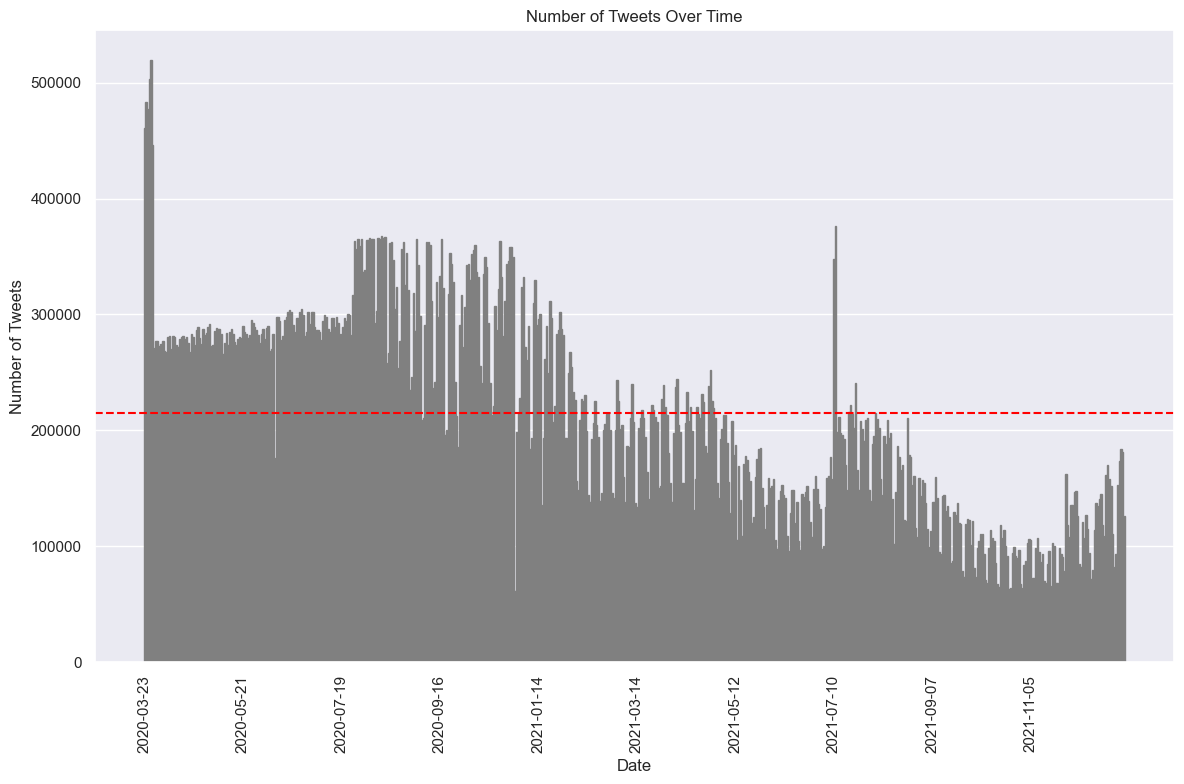

In [18]:
plt.figure(figsize=(12, 8))
df_ = df.groupby('Date')['Number_of_Tweets'].sum().reset_index()
sns.barplot(data=df_, x='Date', y='Number_of_Tweets', color='gray', edgecolor='gray')
plt.axhline(df_['Number_of_Tweets'].mean(), color='red', linestyle='--')
plt.title('Number of Tweets Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10)
plt.tight_layout()
plt.show()

### Number of Tweets by Language

In [19]:
# get all statitics form df_

,Number_of_Tweets
count,588.000000
mean,215110.602041
std,88112.480443
min,61677.000000
25%,141073.500000
50%,209336.000000
75%,286253.500000
max,519194.000000


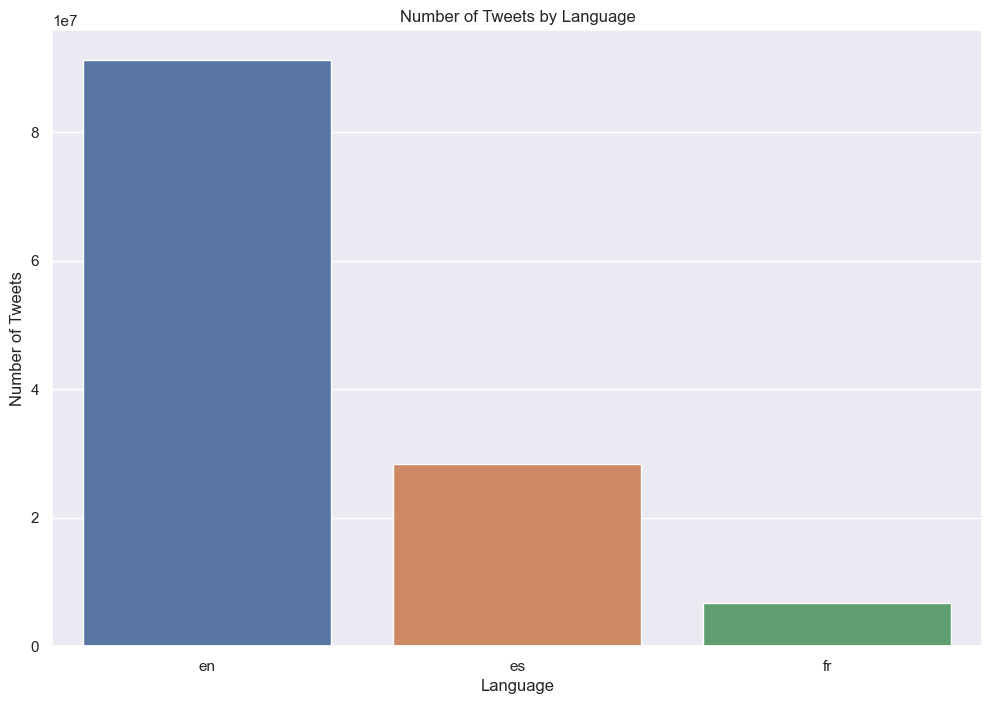

  Language  Number_of_Tweets
0       en          91318297
1       es          28357319
2       fr           6809418


In [17]:
plt.figure(figsize=(12, 8))
df_ = df.groupby('Language')['Number_of_Tweets'].sum().reset_index()
sns.barplot(data=df_, x='Language', y='Number_of_Tweets')
plt.title('Number of Tweets by Language')
plt.ylabel('Number of Tweets')
plt.xlabel('Language')
plt.show()
print(df_)